In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

In [2]:
car_dataset = pd.read_csv('data/car data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.shape

(301, 9)

In [5]:
#get some info abt the data
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [7]:
#encoding the categorical data
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [8]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [9]:
#now we split the data
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_dataset['Selling_Price']

In [10]:
print(X)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [13]:
#model trainig and evaluation

1.linear regression

In [15]:
# from statistics import linear_regression


lin_reg = LinearRegression()

In [16]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [17]:
#prediction on training data
training_prediction = lin_reg.predict(X_train) 

In [18]:
#use r squared error
r_score = metrics.r2_score(y_train, training_prediction) 
print("R squared error of training: ", r_score)

R squared error of training:  0.8799451660493708


In [19]:
# visualise the actual prices and predicted prices

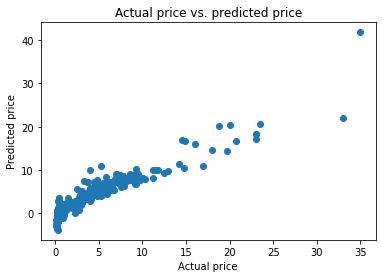

In [20]:
plt.scatter(y_train, training_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs. predicted price')
plt.show()

In [21]:
#prediction on training data
test_prediction = lin_reg.predict(X_test) 

In [22]:
#use r squared error
r_score = metrics.r2_score(y_test, test_prediction) 
print("R squared error of testing: ", r_score)

R squared error of testing:  0.8365766715026374


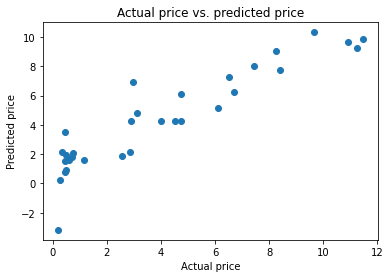

In [23]:
plt.scatter(y_test, test_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs. predicted price')
plt.show()

2.Lasso regression

In [24]:
# from statistics import linear_regression


lasso_reg = Lasso()

In [25]:
lasso_reg.fit(X_train, y_train)

Lasso()

In [26]:
#prediction on training data
training_prediction = lasso_reg.predict(X_train) 

In [27]:
#use r squared error
r_score = metrics.r2_score(y_train, training_prediction) 
print("R squared error of training: ", r_score)

R squared error of training:  0.8427856123435794


In [28]:
# visualise the actual prices and predicted prices

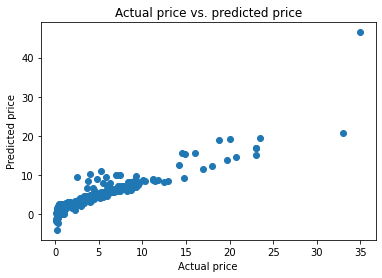

In [29]:
plt.scatter(y_train, training_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs. predicted price')
plt.show()

In [30]:
#prediction on training data
test_prediction = lasso_reg.predict(X_test) 

In [31]:
#use r squared error
r_score = metrics.r2_score(y_test, test_prediction) 
print("R squared error of testing: ", r_score)

R squared error of testing:  0.8709167941173195


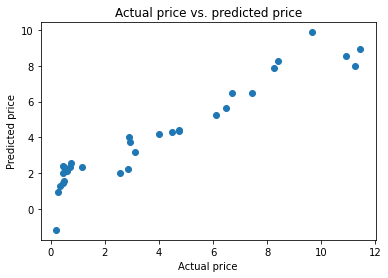

In [32]:
plt.scatter(y_test, test_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs. predicted price')
plt.show()